In [1]:
from datetime import datetime, date
# Imports for 'inspect/explore/reflect' columns
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
# Import 'func' and 'desc' function, in order to execute count and descend
from sqlalchemy import func, or_, and_
from sqlalchemy import desc

engine = create_engine("sqlite:///hawaii.sqlite")

In [2]:
# Import dependencies for 
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Using 'inspect' to look at table columns and types. aka 'explore'

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [4]:
columns = inspector.get_columns('stations')
for column in columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': VARCHAR(length=255), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': VARCHAR(length=255), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [5]:
m_columns = inspector.get_columns('measurements')
for column in m_columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': DATE(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


#### Using 'reflection' to view columns

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [7]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [8]:
list(Stations.__table__.columns)

[Column('id', INTEGER(), table=<stations>, primary_key=True, nullable=False),
 Column('station', VARCHAR(length=255), table=<stations>),
 Column('name', VARCHAR(length=255), table=<stations>),
 Column('latitude', FLOAT(), table=<stations>),
 Column('longitude', FLOAT(), table=<stations>),
 Column('elevation', FLOAT(), table=<stations>)]

In [9]:
list(Measurements.__table__.columns)

[Column('id', INTEGER(), table=<measurements>, primary_key=True, nullable=False),
 Column('station', VARCHAR(), table=<measurements>),
 Column('date', DATE(), table=<measurements>),
 Column('prcp', FLOAT(), table=<measurements>),
 Column('tobs', FLOAT(), table=<measurements>)]

#### Creating the query sessions.  First, check the query implementation by calling all the columns from both tables and storing into variables, then used a for-loop to check the data from the query, and to double-check, imported into pandas dataframe to check if datetime was imported correctly.

In [10]:
session = Session(engine)
station_query = (session.query(Stations.id, Stations.station, Stations.name,
                     Stations.latitude, Stations.longitude, Stations.elevation)
         .all())
for row in station_query:
     print(row.name)

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [11]:
measurement_query = (session.query(Measurements.id, Measurements.station,
                                  Measurements.date, Measurements.prcp,
                                  Measurements.tobs).all())
#  **Storing 'Measurements' table -
#  measurement_query_2 = session.query(Measurements)
# for row in measurement_query:
#      print(row.date.month)

In [12]:
station_df = pd.DataFrame(station_query)
measurements_df = pd.DataFrame(measurement_query)

In [13]:
#station_df.head()

In [14]:
#measurements_df.head()

## Precipitation Analysis
* Querying the 'date' and 'prcp' attributes of Measurements with date filter.  Query is then transformed into dataframe, sorted, and rows with negative values (the rows with 'NaN' were replaced with -10 as a flag) were removed.

In [15]:
prcp_query = session.query(Measurements.date, Measurements.prcp
                          ).filter(Measurements.date >= 
                                   date(year=2016, month=8, day=23)).all()
# for row in prcp_query:
#     print(row)

In [16]:
prcp_query_df = pd.DataFrame(prcp_query)
prcp_query_df = prcp_query_df.sort_values('date').set_index('date')
#prcp_query_df.head()

In [17]:
#df = df.drop(df[df.score < 50].index)
prcp_query_df = prcp_query_df.reset_index()
prcp_query_df = prcp_query_df[prcp_query_df.prcp > -1].set_index('date')
#prcp_query_df.head()

In [18]:
prcp_query_sum = prcp_query_df.groupby('date').mean().reset_index()
prcp_query_sum.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


In [19]:
x_values = np.arange(len(prcp_query_sum.date))
tick_labelling = prcp_query_sum.date
precip = prcp_query_sum.prcp

In [20]:
plt.bar(x_values, precip, color = 'r',
        tick_label=tick_labelling)
plt.xticks(np.arange(10)*37, rotation=30)
plt.ylim(-.1, 2.75)
plt.legend(loc = 'upper left', labels=['prcp'])
plt.title("Bar graph of the last 12 months")


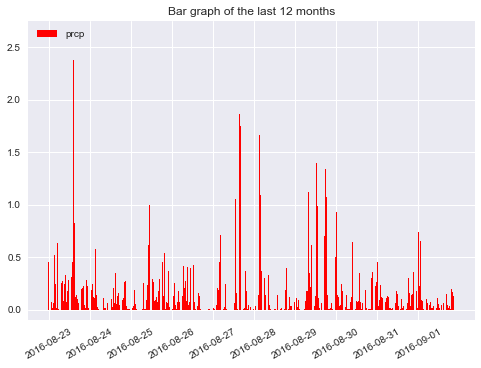

In [21]:
plt.show()

## Station Analysis (#3)
* Calculating number of stations
* Calculating the number of ACTIVE stations 

#### Calculating the number of stations by counting the number of objects in the Stations class.

In [22]:
num_stations = session.query(Stations).count()
num_stations

9

#### Calculating the number of Active stations by importing the 'func' method from sqlalchemy, then using 'group_by' method.  Returns a list of tuples.  Tuples are then unpacked using a for-loop, and a change in the variable 'type'.  Then converted to a Panda dataframe.
* ANSWER TO MOST ACTIVE STATION IS 'USC00519281' WITH A COUNT OF '2772'


* this is based on a count of 'tobs', since 'tobs' did not have any malfunction, all rows were used to count.  As opposed to 'prcp' (in the previous graph), where rows had to be deleted before analysis.

In [23]:
#from sqlalchemy import func
#from sqlalchemy import desc
active_stations = session.query(Measurements.station, func.count
                                (Measurements.station)
                               ).group_by(Measurements.station)
active_stations = active_stations.order_by(desc(func.count(Measurements.station))).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# 'active_stations' is returned as a list of tuples so this for loop will
# unpack the tuples, in order to transform into a dataframe
active_stations_list = []
for each in active_stations:
    active_stations_list.append(list(each))
print(active_stations_list)

[['USC00519281', 2772], ['USC00519397', 2724], ['USC00513117', 2709], ['USC00519523', 2669], ['USC00516128', 2612], ['USC00514830', 2202], ['USC00511918', 1979], ['USC00517948', 1372], ['USC00518838', 511]]


In [25]:
active_stations_list = pd.DataFrame(active_stations_list).sort_values(
    1, ascending=False).reset_index(drop=True)
active_stations_list = active_stations_list.rename(columns={0: 'stations', 1:'count'})
active_stations_list

,stations,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


#### Playing around: Executing SQL statement from Python terminal

In [26]:
blah = engine.execute('select station, count(station) as count from Measurements group by station order by count desc').fetchall()
                       

In [27]:
another_blah = []
for each in blah:
    another_blah.append(list(each))
print(another_blah)

[['USC00519281', 2772], ['USC00519397', 2724], ['USC00513117', 2709], ['USC00519523', 2669], ['USC00516128', 2612], ['USC00514830', 2202], ['USC00511918', 1979], ['USC00517948', 1372], ['USC00518838', 511]]


In [28]:
# another_blah_df = pd.DataFrame(another_blah)
# another_blah_df

#### Calculate number of observations from the most active station

In [29]:
max_station = session.query(Measurements.station, func.count(Measurements.tobs)
                          ).filter(Measurements.date >= 
                                   date(year=2016, month=8, day=23)
                                  ).group_by(Measurements.station).order_by(desc(func.count(Measurements.tobs))).first().station

In [30]:
max_station

'USC00519397'

In [31]:
tobs_query = session.query(Measurements.station, Measurements.date, Measurements.tobs
                          ).filter(Measurements.date >= 
                                   date(year=2016, month=8, day=23)
                                  ).filter(Measurements.station == max_station).all()

In [32]:
tobs_query_df = pd.DataFrame(tobs_query)
tobs_query_df.head()

,station,date,tobs
0,USC00519397,2016-08-23,81.0
1,USC00519397,2016-08-24,79.0
2,USC00519397,2016-08-25,80.0
3,USC00519397,2016-08-26,79.0
4,USC00519397,2016-08-27,77.0


In [33]:
tobs_query_df.tobs.min()

60.0

In [34]:
tobs_query_df.tobs.max()

87.0

In [35]:
bins = [59, 62.25, 64.5, 66.75, 69, 71.25, 73.5, 75.75, 78, 80.25, 82.5, 84.75, 87.25]
len(bins)

13

In [36]:
tobs_query_df['Temp Obs Bins'] = pd.cut(tobs_query_df.tobs, bins)

In [37]:
tobs_query_df_binning = tobs_query_df.sort_values('Temp Obs Bins').groupby('Temp Obs Bins').count()
tobs_query_df_binning = tobs_query_df_binning[['station']].rename(columns={'station':'count'}).reset_index()
tobs_query_df_binning.head()

,Temp Obs Bins,count
0,"(59.0, 62.25]",7
1,"(62.25, 64.5]",9
2,"(64.5, 66.75]",12
3,"(66.75, 69.0]",24
4,"(69.0, 71.25]",30


In [38]:
x_values = np.arange(len(tobs_query_df_binning['count']))
tick_labelling = ['60', '65', '70', '75', '80', '85', '', '' ,'','','','']

In [39]:
plt.bar(x_values, tobs_query_df_binning['count'], color = 'r',
        tick_label=tick_labelling)
plt.xticks(np.arange(6)*2.25)
plt.legend(loc='upper left', labels = ["tobs"])
plt.title("Binning the number tobs")

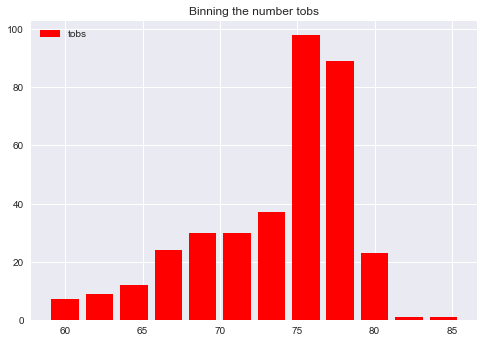

In [40]:
plt.show()

### Calculating your vacation
* Takes in input from user specifying start and end date for vacation, then analyzes the average temperature based on those dates.  Query is filtered using an 'and' function from sqlalchemy, which checks for date values greater and less than the specified date, to get a range.
* Instructions specifically asked for a defining a function, and so a 'tobs_query_func' was designed to take in all of the user inputs, and returns a query object.

In [41]:
year = int(input('What year is your travel plan? ')) -1
start_month = int(input('What is the month of the year are you planning to DEPART? '))
start_day = int(input('What is the day of the month that you are planning to DEPART? '))
end_month = int(input('What is the month of the year are you planning to return? '))
end_day = int(input('What is the day of the month that you are planning to return? '))

What year is your travel plan? 2018
What is the month of the year are you planning to DEPART? 3
What is the day of the month that you are planning to DEPART? 3
What is the month of the year are you planning to return? 3
What is the day of the month that you are planning to return? 20


In [42]:
def tobs_query_func(year, start_month, start_day, end_month, end_day):
    tobs_query = session.query(Measurements.station, Measurements.date, Measurements.tobs
                          ).filter(and_(Measurements.date >= 
                                   date(year, start_month, start_day), Measurements.date <= date(
                                       year, end_month, end_day))).all()
    return(tobs_query)

In [43]:
# tobs_query = session.query(Measurements.station, Measurements.date, Measurements.tobs
#                           ).filter(and_(Measurements.date >= 
#                                    date(year, start_month, start_day), Measurements.date <= date(
#                                        year, end_month, end_day))).all()

In [44]:
tobs_query = tobs_query_func(year, start_month, start_day, end_month, end_day)

tobs_query_df = pd.DataFrame(tobs_query)
tobs_query_df.groupby('date').mean()

,tobs
date,
2017-03-03,72.714286
2017-03-04,74.800000
2017-03-05,70.500000
2017-03-06,69.714286
2017-03-07,68.000000
2017-03-08,69.000000
2017-03-09,69.285714
2017-03-10,68.428571
2017-03-11,76.600000


In [45]:
max_temp = tobs_query_df['tobs'].max()
max_temp

82.0

In [46]:
min_temp = tobs_query_df['tobs'].min()
min_temp

62.0

In [47]:
your_vacation = tobs_query_df['tobs'].mean()
your_vacation

71.30275229357798

In [48]:
# x_values = np.arange(len(tobs_query_df_binning['count']))
# tick_labelling = ['60', '65', '70', '75', '80', '85', '', '' ,'','','','']
x_values = np.arange(1)
tick_labelling = ["Average"]

In [49]:
plt.bar(x_values, your_vacation, color = 'r', tick_label = tick_labelling, yerr = max_temp-min_temp)
plt.xticks(np.arange(1))
plt.ylim(-5, 100)
plt.xlim(-1,1)
plt.ylabel('Temperature (F)')
plt.title("Your vacation temp average")
# for 2-d errorbars
# plt.errorbar((0,.001), (70,60))

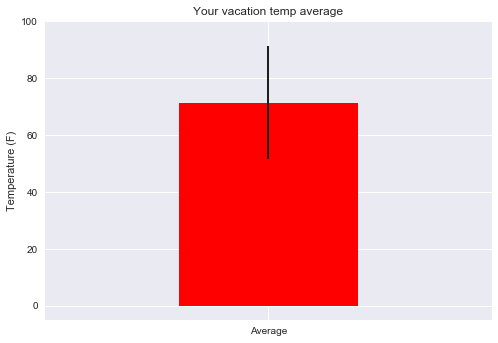

In [50]:
plt.show()

## Optional Recommended Analysis - Incomplete :( 

In [51]:
location_list = []
location_id_list = []
for row in station_query:
    location_list.append(row.name)
    location_id_list.append(row.station)

In [52]:
for each in location_list:
    print('[' +str(location_list.index(each))+ ']' + each)
    
location = int(input('What location are you planning to visit? '))
location_id = location_id_list[location]
location_id

[0]WAIKIKI 717.2, HI US
[1]KANEOHE 838.1, HI US
[2]KUALOA RANCH HEADQUARTERS 886.9, HI US
[3]PEARL CITY, HI US
[4]UPPER WAHIAWA 874.3, HI US
[5]WAIMANALO EXPERIMENTAL FARM, HI US
[6]WAIHEE 837.5, HI US
[7]HONOLULU OBSERVATORY 702.2, HI US
[8]MANOA LYON ARBO 785.2, HI US
What location are you planning to visit? 3


'USC00517948'

In [53]:
def front_loading(one_digit_string):
    if len(one_digit_string) == 1:
        one_digit_string = '0'+one_digit_string
        return one_digit_string
    else:
        return one_digit_string

In [54]:
year = str(int(input('What year is your travel plan? ')) -1)
start_month = str(input('What is the month of the year are you planning to DEPART? '))
start_month = front_loading(start_month)
start_day = str(input('What is the day of the month that you are planning to DEPART? '))
start_day = front_loading(start_day)
end_month = str(input('What is the month of the year are you planning to return? '))
end_month = front_loading(end_month)
end_day = str(input('What is the day of the month that you are planning to return? '))
end_day = front_loading(end_day)

What year is your travel plan? 2018
What is the month of the year are you planning to DEPART? 3
What is the day of the month that you are planning to DEPART? 3
What is the month of the year are you planning to return? 3
What is the day of the month that you are planning to return? 20


In [66]:
type(int(end_day))

int

In [71]:
normals_query = session.query(Measurements.station, Measurements.date, Measurements.tobs
                          ).filter(Measurements.station == location_id).filter(and_(Measurements.date >= 
                                    date(int(year), int(start_month), int(start_day)), Measurements.date <= date(
                                        int(year), int(end_month), int(end_day)))).all()
    
normals_query = session.query(Measurements.station, Measurements.date, Measurements.tobs
                          ).filter(Measurements.station == location_id).filter(and_(
    Measurements.date >= ('%'+'-'+str(start_month)+'-'+str(start_day))), Measurements.date <= ('%'+'-'+str(start_month)+'-'+str(start_day))).all()

In [72]:
for each in normals_query:
    print(each)